## Simulation

In [1]:
import sys
sys.path.append('/Users/thuan/Projects/xp-algorithms/sequential-testing/')

import numpy as np
import pandas as pd
import scipy.stats as stats
import util.helper as helper
import util.sim_rope as sim_rope
import util.msprt_core as msprt_core
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
ss = msprt_core.estimate_sample_size(mu=0.2037, relative_mde_value=0.02, alpha=0.05)
ss*0.15

muA: 0.20370, muB: 0.20777, relative_mde_value: 0.02000, sample_size: 153,226


22983.899999999998

In [9]:
ss = msprt_core.estimate_sample_size(mu=0.2, relative_mde_value=0.1, alpha=0.05)
ss*0.15

muA: 0.20000, muB: 0.22000, relative_mde_value: 0.10000, sample_size: 6,451


967.65

In [2]:
for i in range(2000, 3000):
    np.random.seed(i)
    size = 50000
    a1 = np.cumsum(np.random.binomial(1, 0.2, size=size))
    a2 = np.cumsum(np.random.binomial(1, 0.22, size=size))

    effect1 = []
    ub1 = []
    lb1 = []
    Mu1 = []
    Mu2 = []
    eff2 = []
    mde2 = []
    res = []

    for s in range(size):
        ret = msprt_core.calc_stat(a1[s], s+1, a2[s], s+1, burnIn=0)
        eff2.append(abs(ret['effect']))
        mde2.append(ret['relative_effect'])
        res.append(ret['msprt_res'])
    #print(np.where(np.array(res) == 'B'))
    x = np.where(np.array(res) == 'A')[0]
    if len(x) > 0:
        print(i, len(x), x[0])

/Users/thuan/Projects/xp-algorithms/sequential-testing/util/msprt_core.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  relative_effect = abs(effect)/cvr_a
/Users/thuan/Projects/xp-algorithms/sequential-testing/util/msprt_core.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  Lambda = np.sqrt(V/(V+tau))*np.exp((tau*effect**2)/(2*V*(V+tau)))
/Users/thuan/Projects/xp-algorithms/sequential-testing/util/msprt_core.py:14: RuntimeWarning: invalid value encountered in double_scalars
  Lambda = np.sqrt(V/(V+tau))*np.exp((tau*effect**2)/(2*V*(V+tau)))
/Users/thuan/Projects/xp-algorithms/sequential-testing/util/msprt_core.py:19: RuntimeWarning: divide by zero encountered in log
  decision_boundary = np.sqrt((V*(V+tau)/tau)*(-2*np.log(alpha)-np.log(V/(V+tau))))
/Users/thuan/Projects/xp-algorithms/sequential-testing/util/msprt_core.py:19: RuntimeWarning: invalid value encountered in double_scalars
  decision_boundary = np.sqrt((V*(V+tau)/tau)*(-2*np.log(alp

2003 57 47
2064 1 3
2072 4 70
2119 4 5
2128 10 24
2154 7 198
2170 1 3
2173 1 3
2184 4 34
2189 1 55
2261 1 5
2271 13 24
2286 1 3
2304 5 6
2377 4 3
2388 1 15
2407 1 3
2435 78 33
2460 1 11
2478 1 9
2534 1 16
2591 2 5
2628 1 20
2643 1 25
2682 1 3
2684 1 75
2774 1 3
2784 2 5
2805 7 36
2946 12 5
2984 2 3
2999 1 4


In [34]:
np.random.seed(2003)
size = 50000
a1 = np.cumsum(np.random.binomial(1, 0.2, size=size))
a2 = np.cumsum(np.random.binomial(1, 0.22, size=size))

effect1 = []
ub1 = []
lb1 = []
Mu1 = []
Mu2 = []
eff2 = []
mde2 = []
res = []

for s in range(size):
    ret = msprt_core.calc_stat(a1[s], s+1, a2[s], s+1, burnIn=0)
    eff2.append(ret['effect'])
    mde2.append(ret['relative_effect'])
    res.append(ret['msprt_res'])
    #print(np.where(np.array(res) == 'B'))
print(i, len(np.where(np.array(res) == 'A')[0])), print(np.where(np.array(res) == 'A')), pd.value_counts(res)

2009 57
(array([ 47,  48,  49,  50,  56,  57,  58, 225, 226, 227, 228, 229, 230,
       344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356,
       357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 373,
       374, 375, 376, 377, 378, 397, 398, 399, 400, 401, 402, 403, 404,
       405, 406, 407, 408, 409]),)


(None, None, B    33241
 U    16702
 A       57
 dtype: int64)

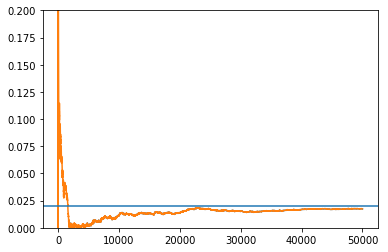

In [42]:
plt.plot(eff2)
plt.plot(abs(np.array(eff2)))
#plt.xlim([1,1000])
plt.ylim([0,0.2])
plt.axhline(0.02)

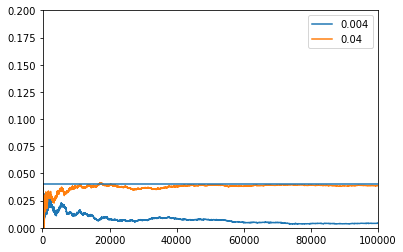

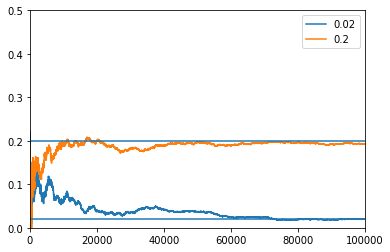

In [73]:
#np.random.seed(2017)
size = 100000
a1 = np.cumsum(np.random.binomial(1, 0.2, size=size))
a2 = np.cumsum(np.random.binomial(1, 0.204, size=size))

effect1 = []
ub1 = []
lb1 = []
Mu1 = []
Mu2 = []
eff1 = []
mde1 = []

for s in range(size):
    ret = msprt_core.calc_stat(a1[s], s+1, a2[s], s+1, burnIn=0)
    eff1.append(abs(ret['effect']))
    mde1.append(ret['relative_mde_value'])
    #print("{}, {}, {}, {:.5f}, {:.5f}, {:.5f}, {:.0f}"
    #      .format(s, ret['msprt_res'], ret['apply_msprt'], ret['cvr_a'], ret['cvr_b'], ret['relative_mde_value'], 
    #              ret['ss']))
    
#np.random.seed(2016)
#size = 10000
a1 = np.cumsum(np.random.binomial(1, 0.2, size=size))
a2 = np.cumsum(np.random.binomial(1, 0.24, size=size))

effect1 = []
ub1 = []
lb1 = []
Mu1 = []
Mu2 = []
eff2 = []
mde2 = []

for s in range(size):
    ret = msprt_core.calc_stat(a1[s], s+1, a2[s], s+1, burnIn=0)
    eff2.append(abs(ret['effect']))
    mde2.append(ret['relative_mde_value'])
    #print("{}, {}, {}, {:.5f}, {:.5f}, {:.5f}, {:.0f}"
    #      .format(s, ret['msprt_res'], ret['apply_msprt'], ret['cvr_a'], ret['cvr_b'], ret['relative_mde_value'], 
    #              ret['ss']))
plt.plot(eff1, label='0.004')
plt.plot(eff2, label='0.04')
plt.legend()
plt.axhline(0.04)
plt.axhline(0.4)
plt.xlim([100,size])
plt.ylim([0,0.2])
plt.show()

plt.plot(mde1, label='0.02')
plt.plot(mde2, label='0.2')
plt.legend()
plt.axhline(0.02)
plt.axhline(0.2)
plt.xlim([100,size])
plt.ylim([0,0.5])
plt.show()

#plt.yticks([0, 0.02, 0.05, 0.1,0.2,0.3,0.4,0.5])
#plt.yticks([0, 0.02, 0.05, 0.1,0.2,0.3,0.4,0.5])

(0, 0.5)

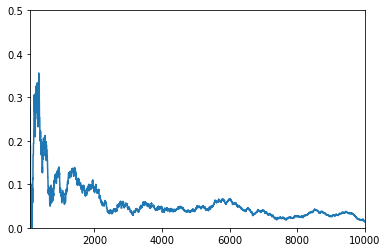

In [16]:
np.random.seed(2017)
size = 10000
a1 = np.cumsum(np.random.binomial(1, 0.2, size=size))
a2 = np.cumsum(np.random.binomial(1, 0.204, size=size))

effect1 = []
ub1 = []
lb1 = []
Mu1 = []
Mu2 = []
eff = []

for s in range(size):
    ret = msprt_core.calc_stat(a1[s], s+1, a2[s], s+1, burnIn=0.15)
    eff.append(ret['relative_mde_value'])
    #print("{}, {}, {}, {:.5f}, {:.5f}, {:.5f}, {:.0f}"
    #      .format(s, ret['msprt_res'], ret['apply_msprt'], ret['cvr_a'], ret['cvr_b'], ret['relative_mde_value'], 
    #              ret['ss']))
plt.plot(eff)
plt.xlim([100,size])
plt.ylim([0,0.5])

In [3]:
np.random.seed(2028)
size = 3000
a1 = np.cumsum(np.random.binomial(1, 0.2, size=size))
a2 = np.cumsum(np.random.binomial(1, 0.22, size=size))

effect1 = []
ub1 = []
lb1 = []
Mu1 = []
Mu2 = []

for s in range(size):
    ret = msprt_core.calc_stat(a1[s], s+1, a2[s], s+1)
    print("{}, {}, {}, {:.3f}, {:.3f}, {:.5f}, {:.0f}"
          .format(s, ret['msprt_res'], ret['apply_msprt'], ret['cvr_a'], ret['cvr_b'], ret['relative_mde_value'], 
                  ret['ss']))

0, U, False, 0.000, 0.000, 0.00000, 0
1, U, False, 0.000, 0.000, 0.00000, 0
2, U, False, 0.000, 0.333, 0.00000, 0
3, U, False, 0.000, 0.250, 0.00000, 0
4, U, False, 0.000, 0.400, 0.00000, 0
5, U, False, 0.000, 0.500, 0.00000, 0
6, U, False, 0.000, 0.429, 0.00000, 0
7, U, False, 0.000, 0.375, 0.00000, 0
8, U, False, 0.111, 0.444, 3.00000, 0
9, U, False, 0.100, 0.400, 3.00000, 0
10, U, False, 0.091, 0.455, 4.00000, 0
11, U, False, 0.083, 0.500, 5.00000, 0
12, U, False, 0.077, 0.462, 5.00000, 0
13, U, False, 0.071, 0.429, 5.00000, 0
14, U, False, 0.067, 0.400, 5.00000, 0
15, U, False, 0.062, 0.375, 5.00000, 0
16, U, False, 0.059, 0.412, 6.00000, 0
17, U, False, 0.056, 0.389, 6.00000, 0
18, U, False, 0.053, 0.368, 6.00000, 0
19, U, False, 0.050, 0.350, 6.00000, 0
20, U, False, 0.048, 0.333, 6.00000, 0
21, U, False, 0.045, 0.318, 6.00000, 0
22, U, False, 0.043, 0.304, 6.00000, 0
23, U, False, 0.042, 0.292, 6.00000, 0
24, U, False, 0.040, 0.280, 6.00000, 0
25, U, False, 0.038, 0.308, 7.00000

2200, U, True, 0.194, 0.227, 0.16862, 362
2201, U, True, 0.194, 0.227, 0.16862, 362
2202, U, True, 0.194, 0.227, 0.16862, 362
2203, U, True, 0.194, 0.227, 0.16822, 363
2204, U, True, 0.194, 0.227, 0.16822, 363
2205, U, True, 0.194, 0.227, 0.16550, 374
2206, U, True, 0.194, 0.227, 0.16550, 374
2207, U, True, 0.194, 0.226, 0.16550, 374
2208, U, True, 0.194, 0.226, 0.16550, 375
2209, U, True, 0.194, 0.226, 0.16550, 375
2210, U, True, 0.194, 0.227, 0.16783, 365
2211, U, True, 0.194, 0.226, 0.16512, 376
2212, U, True, 0.194, 0.227, 0.16744, 366
2213, U, True, 0.194, 0.227, 0.16977, 356
2214, U, True, 0.194, 0.228, 0.17209, 347
2215, U, True, 0.194, 0.227, 0.16937, 357
2216, U, True, 0.195, 0.227, 0.16667, 368
2217, U, True, 0.195, 0.228, 0.16898, 358
2218, U, True, 0.195, 0.228, 0.16898, 359
2219, U, True, 0.195, 0.227, 0.16628, 369
2220, U, True, 0.195, 0.227, 0.16628, 369
2221, U, True, 0.195, 0.227, 0.16628, 370
2222, U, True, 0.195, 0.227, 0.16628, 370
2223, U, True, 0.195, 0.227, 0.166

In [3]:
ss = msprt_core.estimate_sample_size(mu=0.2, relative_mde_value=0.2, alpha=0.05)
ss*0.15

muA: 0.20000, muB: 0.24000, relative_mde_value: 0.20000, sample_size: 1,665


249.75

In [5]:
np.random.seed(2015)
size = 3000
a1 = np.cumsum(np.random.binomial(1, 0.2, size=size))
a2 = np.cumsum(np.random.binomial(1, 0.24, size=size))

effect1 = []
ub1 = []
lb1 = []
Mu1 = []
Mu2 = []

for s in range(size):
    ret = msprt_core.calc_stat(a1[s], s+1, a2[s], s+1)
    print("{}, {}, {}, {:.3f}, {:.3f}, {:.5f}, {:.0f}"
          .format(s, ret['msprt_res'], ret['apply_msprt'], ret['cvr_a'], ret['cvr_b'], ret['relative_mde_value'], 
                  ret['ss']))

0, U, False, 0.000, 1.000, 0.00000, 0
1, U, False, 0.000, 0.500, 0.00000, 0
2, U, False, 0.333, 0.333, 0.00000, 0
3, U, False, 0.250, 0.250, 0.00000, 0
4, U, False, 0.400, 0.400, 0.00000, 0
5, U, False, 0.500, 0.333, 0.33333, 0
6, U, False, 0.429, 0.286, 0.33333, 0
7, U, False, 0.500, 0.375, 0.25000, 0
8, U, False, 0.444, 0.333, 0.25000, 0
9, U, False, 0.400, 0.300, 0.25000, 0
10, U, False, 0.364, 0.364, 0.00000, 0
11, U, False, 0.333, 0.417, 0.25000, 0
12, U, False, 0.308, 0.385, 0.25000, 0
13, U, False, 0.286, 0.357, 0.25000, 0
14, U, False, 0.267, 0.400, 0.50000, 0
15, U, False, 0.250, 0.375, 0.50000, 0
16, U, False, 0.235, 0.353, 0.50000, 0
17, U, False, 0.222, 0.333, 0.50000, 0
18, U, False, 0.211, 0.368, 0.75000, 0
19, U, False, 0.200, 0.350, 0.75000, 0
20, U, False, 0.190, 0.381, 1.00000, 0
21, U, False, 0.182, 0.364, 1.00000, 0
22, U, False, 0.217, 0.348, 0.60000, 0
23, U, False, 0.208, 0.333, 0.60000, 0
24, U, False, 0.200, 0.320, 0.60000, 0
25, U, False, 0.192, 0.308, 0.60000

2004, U, True, 0.209, 0.228, 0.09048, 1111
2005, U, True, 0.210, 0.229, 0.09026, 1113
2006, U, True, 0.210, 0.229, 0.08768, 1176
2007, U, True, 0.211, 0.229, 0.08511, 1244
2008, U, True, 0.211, 0.228, 0.08511, 1245
2009, U, True, 0.211, 0.229, 0.08491, 1248
2010, U, True, 0.211, 0.229, 0.08235, 1322
2011, U, True, 0.212, 0.229, 0.07981, 1403
2012, U, True, 0.212, 0.229, 0.07963, 1406
2013, U, True, 0.213, 0.229, 0.07710, 1495
2014, U, True, 0.213, 0.229, 0.07459, 1592
2015, U, True, 0.213, 0.229, 0.07459, 1593
2016, U, True, 0.213, 0.229, 0.07459, 1594
2017, U, True, 0.213, 0.228, 0.07209, 1701
2018, U, True, 0.213, 0.228, 0.07209, 1702
2019, U, True, 0.213, 0.228, 0.06961, 1820
2020, U, True, 0.213, 0.229, 0.07193, 1707
2021, U, True, 0.214, 0.229, 0.07176, 1711
2022, U, True, 0.214, 0.229, 0.07176, 1712
2023, U, True, 0.213, 0.229, 0.07176, 1713
2024, U, True, 0.213, 0.229, 0.07176, 1714
2025, U, True, 0.213, 0.229, 0.07176, 1715
2026, U, True, 0.214, 0.228, 0.06928, 1834
2027, U, Tr

/Users/thuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


(0, 200)

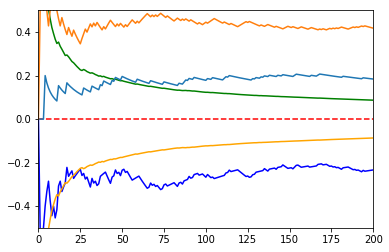

In [25]:
np.random.seed(2021)
size = 10000
a1 = np.cumsum(np.random.binomial(1, 0.2, size=size))
a2 = np.cumsum(np.random.binomial(1, 0.4, size=size))

effect1 = []
ub1 = []
lb1 = []
Mu1 = []
Mu2 = []

for i in range(10000):
    n = i+1
    mu1 = a1[i]/n
    mu2 = a2[i]/n
    Mu1.append(mu1)
    Mu2.append(mu2)
    effect1.append(mu1-mu2)
    v1 = mu1*(1-mu1)
    v2 = mu2*(1-mu2)
    sigma = np.sqrt(v1/n+v2/n)
    df0 = (v1/n+v2/n)**2
    df1 = (v1**2/(n**2*(n-1)))+(v2**2/(n**2*(n-1)))
    df = df0/df1
    pv = stats.t.ppf(0.975, df) 
    ub1.append(pv*sigma)
    lb1.append(-1*pv*sigma)
    
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(effect1, color='blue')
plt.plot(ub1, color='green')
plt.plot(lb1, color='orange')
plt.plot(Mu1, label='mu1')
plt.plot(Mu2, label='mu2')
plt.ylim([-0.5,0.5])
plt.xlim([0,200])

In [23]:
ss = helper.sample_size(mu=0.8, mde_value=0.3, pr=True)

Sample size for mu=0.8000, relative_mde_value=0.3000, absolute_mde_value=0.2400, alpha=0.0500, beta=0.0500:
variant_sample_size=27, total_sample_size=53


/Users/thuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/Users/thuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


(-0.95, 0.95)

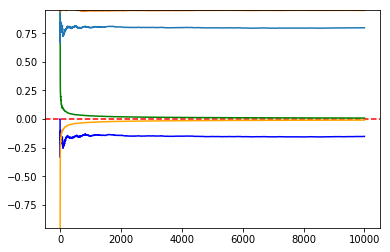

In [17]:
np.random.seed(2029)
size = 10000
a1 = np.cumsum(np.random.binomial(1, 0.8, size=size))
a2 = np.cumsum(np.random.binomial(1, 0.95, size=size))

effect1 = []
ub1 = []
lb1 = []
Mu1 = []
Mu2 = []

for i in range(10000):
    n = i+1
    mu1 = a1[i]/n
    mu2 = a2[i]/n
    Mu1.append(mu1)
    Mu2.append(mu2)
    effect1.append(mu1-mu2)
    v1 = mu1*(1-mu1)
    v2 = mu2*(1-mu2)
    sigma = np.sqrt(v1/n+v2/n)
    df0 = (v1/n+v2/n)**2
    df1 = (v1**2/(n**2*(n-1)))+(v2**2/(n**2*(n-1)))
    df = df0/df1
    pv = stats.t.ppf(0.975, df) 
    ub1.append(pv*sigma)
    lb1.append(-1*pv*sigma)
    
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(effect1, color='blue')
plt.plot(ub1, color='green')
plt.plot(lb1, color='orange')
plt.plot(Mu1, label='mu1')
plt.plot(Mu2, label='mu2')
plt.ylim([-0.95,0.95])

In [50]:
mu_lst = [0.02, 0.05, 0.08, 0.2, 0.5, 0.8]

for mu in mu_lst:
    s1 = helper.sample_size(mu=mu, mde_value=0.02, pr=False)
    ss1 = s1['variant_sample_size']
    ss2 = msprt_core.estimate_sample_size(mu, relative_mde_value=0.02, pr=False)
    print("mu={:.2f}, ss1={:,.0f}, ss2={:,.0f}, {:.2f}, {:.2f}"
          .format(mu, ss1, ss2, ss1/ss2, ss1*0.1/(ss2*0.15)))

mu=0.02, ss1=3,214,878, ss2=1,925,209, 1.67, 1.11
mu=0.05, ss1=1,246,180, ss2=746,266, 1.67, 1.11
mu=0.08, ss1=754,005, ss2=451,531, 1.67, 1.11
mu=0.20, ss1=261,830, ss2=156,795, 1.67, 1.11
mu=0.50, ss1=64,961, ss2=38,901, 1.67, 1.11
mu=0.80, ss1=15,743, ss2=9,427, 1.67, 1.11
